In [1]:
!pip install -q einops peft open_clip_torch protobuf sentencepiece iv2-utils

DEPRECATION: Loading egg at /opt/miniconda3/lib/python3.12/site-packages/pyFluidSynth-1.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import sys
import os

sys.path.append(os.getcwd())
import numpy as np
import os
import io
import cv2

import torch

from demo.config import (Config,
                    eval_dict_leaf)

from demo.utils import (retrieve_text,
                  _frame_from_video,
                  setup_internvideo2)

from iv2_utils.iv2 import *

/usr/local/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/root/IV2/InternVideo2/multi_modality/models/backbones/internvideo2/internvl_clip_vision.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/root/IV2/InternVideo2/multi_modality/models/backbones/internvideo2/internvideo2.py:135: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is

No module named 'deepspeed'
deepspeed is not installed!!!


In [2]:
from huggingface_hub import hf_hub_download, snapshot_download
from transformers import AutoTokenizer
from models.backbones.bert.tokenization_bert import BertTokenizer

bert_path = snapshot_download(repo_id="google-bert/bert-large-uncased")

vision_ckpt_path = hf_hub_download(repo_id="OpenGVLab/InternVideo2-Stage2_1B-224p-f4", filename="InternVideo2-stage2_1b-224p-f4.pt")

extra_ckpt = hf_hub_download(repo_id="OpenGVLab/InternVideo2-CLIP-1B-224p-f8", filename="1B_clip.pth")

bert_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-large-uncased")#, local_files_only=True)

In [3]:
config = Config.from_file('demo/internvideo2_stage2_config.py')
config = eval_dict_leaf(config)
# config.device = 'mps'

# config.model.text_ckpt_path = 'model/internvl_c_13b_224px.pth'
config.model.vision_ckpt_path = vision_ckpt_path
config.model.vision_encoder.pretrained = vision_ckpt_path
# config.model.tokenizer_path = bert_path
# config.model.text_encoder.llama_path = 'model/chinese_alpaca_lora_7b'
config.model.extra_ckpt_path = extra_ckpt

In [5]:
help(setup_internvideo2)

Help on function setup_internvideo2 in module demo.utils:

setup_internvideo2(config: dict)



In [4]:
from models.internvideo2_stage2 import InternVideo2_Stage2
from models.internvideo2_clip import InternVideo2_CLIP
intern_model = setup_internvideo2(config)
# intern_model = intern_model.to_empty(device="cuda")

In [5]:
import torch
total_params = sum(p.numel() for p in intern_model.parameters())

print(f'Total number of parameters: {total_params:,}')

Total number of parameters: 1,410,177,015


In [10]:
frames[0].shape

(480, 640, 3)

In [6]:
video = cv2.VideoCapture('./demo/example1.mp4')
phrase = "A person and a dog chasing each other."
frames = [x for x in _frame_from_video(video)]
texts, probs = retrieve_text(frames, [phrase], model=intern_model, topk=1, config=config, device = torch.device("cuda"))

/usr/local/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0'), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

AttributeError: 'tuple' object has no attribute 'norm'

In [5]:
import pandas as pd
import numpy as np

val_data = pd.read_csv('k600/val.csv').iloc[:,0:2]
videos = os.listdir('k600/part_0')

print(val_data.head())
print()
print(videos[-5:])

id_label_map = {}
for row in range(len(val_data)):
    id_label_map[val_data.iloc[row]['youtube_id']] = val_data.iloc[row]['label']

remove_points = len(videos) - 500
sampled_points = np.random.choice(videos, remove_points, replace=False)
classes = val_data['label'].unique()
for i in sampled_points:
    os.remove(f'k600/part_0/{i}')
print(f"Removed {remove_points} Videos!")

       label   youtube_id
0  abseiling  0wR5jVB-WPk
1  abseiling  3caPS4FHFF8
2  abseiling  3yaoNwz99xM
3  abseiling  6IbvOJxXnOo
4  abseiling  6_4kjPiQr7w

['-j3eNzQR-EI_000064_000074.mp4', '-C-PvafuvFE_000068_000078.mp4', '0yNXOIqJLtA_000012_000022.mp4', '13Ub1MDkiHc_000014_000024.mp4', '-IlFdaVdEyU_000001_000011.mp4']
Removed 0 Videos!


In [14]:
gif87_dir = '../../../photography-model/GIF87'
output_dir = 'output'

gif87_anno = pickle_read(os.path.join(gif87_dir, '../rustyjar/GIF87-anno.pkl'))
phrases = [x[1][1] for x in gif87_anno]
print(phrases[:5])

['woman falls down', 'woman falls down', 'guy falls down onto couch', 'person falls down', 'guy falls down']


In [11]:
phrases = [x[1] for x in pickle_read('../../../photography-model/rustyjar/STOCK100.pkl')]
print(phrases[:5])

['A small kid falls down onto the ground.', 'A brown horse jumps over the hurdle.', 'A kid splashes into the water.', 'A dog splashes into the water.', 'A person splashes into the pool.']


In [5]:
bruh = torch.device('mps')

In [6]:
bruh.type

'mps'

In [12]:
probs

array([26.429283], dtype=float32)

In [5]:
from tqdm.notebook import tqdm

logits = []
preds  = []

gif87_dir = '../../../photography-model/GIF100'
output_dir = 'output'
for check in tqdm(range(1, 101)):
    split_video_to_mp4(os.path.join(gif87_dir, f'{check}.mp4'), output_dir=output_dir, window_size=8)

    logit_curr = []
    pbar = tqdm(get_output_dir(output_dir))
    for j in pbar:
        video = cv2.VideoCapture(j)
        pbar.set_description(j)
        frames = [x for x in _frame_from_video(video)]
    
        phrase = phrases[check - 1]
        
        texts, probs = retrieve_text(frames, [phrase], model=intern_model, topk=1, config=config, device = "mps")
        logit_curr.append(probs[0])
    preds.append(np.argmax(logit_curr) + 1)
    logits.append(list(zip(logit_curr, range(1, len(logit_curr) + 1))))

print(preds[:5])
pickle_write(preds, 'stock100-preds.pkl')
pickle_write(logits, 'stock100-logits.pkl')

  0%|          | 0/100 [00:00<?, ?it/s]

OpenCV: Couldn't read video stream from file "../../../photography-model/GIF100/1.mp4"


0it [00:00, ?it/s]

ValueError: attempt to get argmax of an empty sequence

In [9]:
from tqdm.notebook import tqdm

logits = []
preds  = []
for check in tqdm(range(1, 51)):
    split_video_to_mp4(os.path.join('../../../photography-model/backflip', f'{check}.mp4'), output_dir=output_dir, window_size=8)

    logit_curr = []
    pbar = tqdm(get_output_dir(output_dir))
    for j in pbar:
        video = cv2.VideoCapture(j)
        pbar.set_description(j)
        frames = [x for x in _frame_from_video(video)]
        
        texts, probs = retrieve_text(frames, ['A person performing a backflip.'], model=intern_model, topk=1, config=config, device = "cpu")
        logit_curr.append(probs[0])
    preds.append(np.argmax(logit_curr) + 1)
    logits.append(list(zip(logit_curr, range(1, len(logit_curr) + 1))))

print(preds[:5])
pickle_write(preds, 'preds-r.pkl')
pickle_write(logits, 'logits-r.pkl')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/293 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [57]:
from IPython.display import clear_output
top1 = 0
top5 = 0
total = 0
collect_data = []
for check in videos:
    video = cv2.VideoCapture(f'k600/part_0/{check}')
    frames = [x for x in _frame_from_video(video)]
    
    video_label = id_label_map[check[:11]]
    
    texts, probs = retrieve_text(frames, classes, model=intern_model, topk=5, config=config, device = "cpu")
    collect_data.append((texts, probs))
    clear_output(wait=True)
    if texts[0] == video_label:
        top1 += 1
    if video_label in texts:
        top5 += 1
    total += 1
    print(f"{total}/500 Completed")
    print('-'*25)
    print("Correct:", video_label)
    print('-'*25)
    print('Predictions ' + '-'*13)
    for i, v in zip(texts, probs):
        print(f'{v:.4f}', '|', i)
    print('-'*25)
    print("Top 1:",top1/total)
    print("Top 5:", top5/total)

23/500 Completed
-------------------------
Correct: counting money
-------------------------
Predictions -------------
19.8364 | counting money
12.1297 | using computer
11.9010 | auctioning
10.9561 | tossing coin
9.4168 | vault
-------------------------
Top 1: 0.7391304347826086
Top 5: 0.8695652173913043


KeyboardInterrupt: 

$$\Large \textbf{Before-After}$$

------------

In [50]:
import os
import google.generativeai as genai
from IPython.display import display, Markdown, Latex

genai.configure(api_key="")
gemini = genai.GenerativeModel("gemini-1.5-flash")

In [57]:
def before_after(text):
    chat = gemini.start_chat(
        history=[
            {"role": "user", "parts": 'When you answer a question, please be concise and only answer with a single sentence.'},
        ]
    )
    before = chat.send_message(f"Given the action '{text}', create a new action that describes the moments up until '{text}' occurs.").text
    
    chat = gemini.start_chat(
        history=[
            {"role": "user", "parts": 'When you answer a question, please be concise and only answer with a single sentence.'},
        ]
    )
    after = chat.send_message(f"Given the action '{text}', create a new action that describes the moments after '{text}' occurs.").text
    return (before, after)

In [62]:
now = "A dog catching a frisbee midair."
before, after = before_after(now)
before = before.strip()
after = after.strip()

In [65]:
split_video_to_mp4('../../../photography-model/ACT75/8.mp4', 'output', window_size=8)
clips = get_output_dir('output')

prob_data = []
for clip in tqdm(clips):
    video = cv2.VideoCapture(clip)
    frames = [x for x in _frame_from_video(video)]
    
    texts, probs = retrieve_text(frames, [before, now, after], model=intern_model, topk=3, config=config, device = "cpu")
    prob_data.append(probs)

  0%|          | 0/211 [00:00<?, ?it/s]

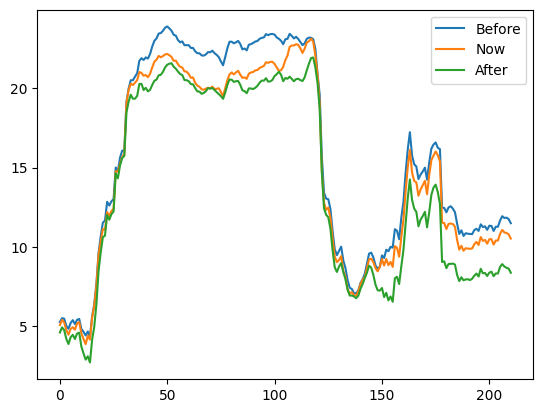

In [68]:
for phrase in range(3):
    plt.plot([x[phrase] for x in prob_data], label = "Before" if phrase == 0 else ("Now" if phrase == 1 else "After"))
plt.legend()
plt.show()

In [67]:
pickle_read('../../../photography-model/rustyjar/ACT75.pkl')[7]

('ACT75/8.mp4',
 'A dog catching a frisbee midair.',
 [53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123])